In [0]:
import collections
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#import seaborn as sns
#sns.set()


In [0]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2,3]] #2,3번 칼럼만 이용하자
Y = iris.target

In [0]:
NUM = 100
select = np.random.permutation(150)
Xtr, Ytr = X[select[:NUM]], Y[select[:NUM]]
Xte, Yte = X[select[NUM:]], Y[select[NUM:]]
print(Xtr.shape)
print(Xte.shape)

(100, 2)
(50, 2)


## k-NN(Nearest Neighbor)를 직접 구현해보자


k-NN의 아이디어는 간단하다. 
어떤 새로운 데이터  new_x에 대하여, 기존의 데이터(학습 데이터)에서 new_x와 가장 가까운 이웃들 k개를 찾는다. 
이 이웃들이 무슨 y값을 가지는지에 따라 new_x의 new_y값이 결정된다.

### k-NN 이해하기 좋은 데모 사이트 - Stanford
http://vision.stanford.edu/teaching/cs231n-demos/knn/

In [0]:
# Euclidean Distance Caculator
def dist(a, b):
    return np.linalg.norm(a - b) # default norm: norm 2
  
def dist_many(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax) # default norm: norm 2

In [0]:
class MyKnn(object):
  def __init__(self):
    pass
  
  def fit(self, x, y, k):
    '''
    k-NN의 학습은 모든 데이터 자체를 그대로 기억(저장)하는 것이다.
    '''
    self.X = x.copy()
    self.Y = y.copy()
    self.K = k
  
  def predict_one(self, new_x): 
    '''
    한개의 새로운 x에 대하여, 기존의 데이터(학습 데이터)에서 x와 가장 가까운 이웃들을 찾는다. 
    이 이웃들이 무슨 y값을 가지는지에 따라 new_x의 new_y값이 결정된다.
    '''
    distance = [dist(x, new_x) for x in self.X]
    d_and_y = zip(distance, self.X, self.Y)
    print('== Distance, X, Y')
    for v in d_and_y:
      print(v)
    
    
    d_and_y = zip(distance, self.X, self.Y)
    ''' 거리순으로 sort '''
    rank = sorted(d_and_y, key=lambda x: x[0])
    print('== Sorted')
    for v in rank[:self.K]:
      print(v)
    
    ''' y값 중에 어느 값이 제일 많은지 확인. 다수결로 정함. '''
    new_y = [v[2] for v in rank[:self.K]]
    print('new_y', new_y)
    cnter = collections.Counter(new_y)
    print(cnter.most_common(1)) # value & counter
    # 가장 빈도가 높은 y값
    y = cnter.most_common(1)[0][0]
    print('최종 y', y)
    return y

  def predict(self, xlist): 
    '''
    여러 x들에 대해 k-NN 수행
    '''
    ylist = []
    for new_x in xlist:
      distance = [np.linalg.norm(x-new_x, 2) for x in self.X]
      d_and_y = zip(distance, self.X, self.Y)
      rank = sorted(d_and_y, key=lambda x: x[0])
      new_y = [v[2] for v in rank[:self.K]]
      cnter = collections.Counter(new_y)
      y = cnter.most_common(1)[0][0]
      ylist.append(y)
    return np.array(ylist)
  
  

In [0]:
knn = MyKnn()
knn.fit(Xtr[:10], Ytr[:10], 3)
knn.predict_one(Xte[0])

== Distance, X, Y
(0.8062257748298545, array([4.4, 1.4]), 1)
(0.30000000000000004, array([5.1, 1.5]), 2)
(0.5385164807134503, array([5.3, 2.3]), 2)
(4.031128874149275, array([1.4, 0.2]), 0)
(0.5656854249492378, array([4.7, 1.4]), 1)
(3.6400549446402586, array([1.7, 0.5]), 0)
(0.5999999999999999, array([5.1, 2.4]), 2)
(0.5830951894845302, array([5.4, 2.3]), 2)
(1.7888543819998315, array([3.5, 1. ]), 1)
(0.6708203932499374, array([5.7, 2.1]), 2)
== Sorted
(0.30000000000000004, array([5.1, 1.5]), 2)
(0.5385164807134503, array([5.3, 2.3]), 2)
(0.5656854249492378, array([4.7, 1.4]), 1)
new_y [2, 2, 1]
[(2, 2)]
최종 y 2


2

### k-NN classification 정확도 측정 - 테스트 데이터로 (Xte)

In [0]:
Yte2 = knn.predict(Xte)

In [0]:
cmp = (Yte == Yte2)
correct = np.sum(cmp)
total = len(Yte)
score = correct/float(total)
print('스코어 %.2f' % score)

스코어 0.98


### 학습 데이터 plot - Xtr

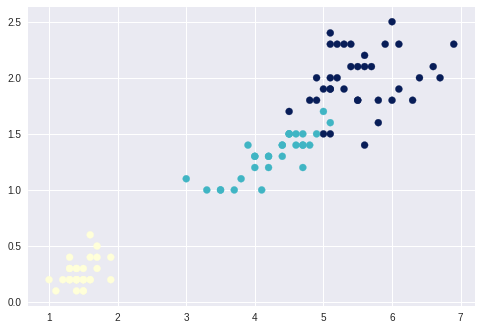

In [0]:
plt.scatter(Xtr[:, 0], Xtr[:, 1], c=Ytr, cmap='YlGnBu')

### 테스트 데이터를 찍어보자  - R,G,B

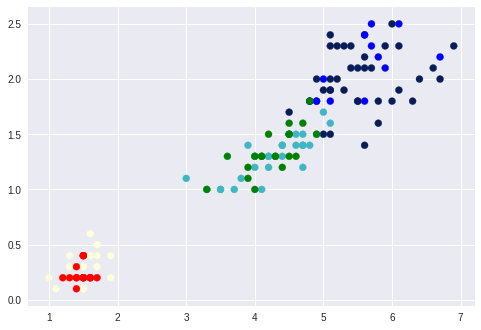

In [0]:
mycolors = ['r', 'g', 'b', 'y', 'c', 'm']
mycmap = [mycolors[y] for y in Yte]
# plt.scatter(Xtr[:, 0], Xtr[:, 1], c=Ytr, cmap='YlGnBu')
plt.scatter(Xte[:, 0], Xte[:, 1], c=mycmap)

# scikit-learn k-NN

## k-NN 학습, 테스트, 분류 정확도 스코어

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr, Ytr) 
Yte2 = knn.predict(Xte)


In [0]:
score = knn.score(Xte, Yte)
print('%.2f' % score)

0.98


In [0]:
cmp = (Yte == Yte2)
correct = np.sum(cmp)
total = len(Yte)
score = correct/float(total)
print('스코어 %.2f' % score)

스코어 0.98


## k-NN 이웃들을 찾기

In [0]:
dist, idx_of_nn = knn.kneighbors(np.array([[1,2]]), 3)
print('이웃들의 번호', idx_of_nn)
print('이웃들과 거리', dist)
print('이웃들의 값', Xtr[idx_of_nn])
print('이웃들의 종류', Ytr[idx_of_nn])

이웃들의 번호 [[11 30  5]]
이웃들과 거리 [[1.52315462 1.62788206 1.65529454]]
이웃들의 값 [[[1.6 0.6]
  [1.3 0.4]
  [1.7 0.5]]]
이웃들의 종류 [[0 0 0]]


In [0]:
dist, idx_of_nn1 = knn.kneighbors(np.array([[2,1]]), 20)
dist, idx_of_nn2 = knn.kneighbors(np.array([[2.5,1]]), 20)
dist, idx_of_nn3 = knn.kneighbors(np.array([[4,2]]), 20)

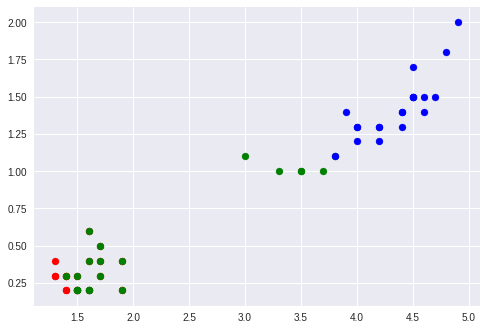

In [0]:
plt.scatter(Xtr[idx_of_nn1, 0], Xtr[idx_of_nn1, 1], c='r')
plt.scatter(Xtr[idx_of_nn2, 0], Xtr[idx_of_nn2, 1], c='g')
plt.scatter(Xtr[idx_of_nn3, 0], Xtr[idx_of_nn3, 1], c='b')